In [1]:
# Importing the required classes and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create a dataframe
df = pd.read_csv('breast-cancer-wisconsin.data' ,header = None, delimiter=',')
df.columns=['Sample code no.','Clump thickness','Uniformity-cell size',
            'Uniformity-cell shape','Marginal Adhesion',
            'Single Epithelial cell size','Bare Nuclei','Bland Chromatin',
            'Normal Nucleoli','Mitoses','Class']

In [3]:
df.head()

,Sample code no.,Clump thickness,Uniformity-cell size,Uniformity-cell shape,Marginal Adhesion,Single Epithelial cell size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
# An instance of data - set that has a missing(unavailable) value
print(df.loc[23,:])

Sample code no.                1057013
Clump thickness                      8
Uniformity-cell size                 4
Uniformity-cell shape                5
Marginal Adhesion                    1
Single Epithelial cell size          2
Bare Nuclei                          ?
Bland Chromatin                      7
Normal Nucleoli                      3
Mitoses                              1
Class                                4
Name: 23, dtype: object


In [6]:
df.replace('?',np.nan, inplace=True)

In [7]:
print(df.loc[23,:])

Sample code no.                1057013
Clump thickness                      8
Uniformity-cell size                 4
Uniformity-cell shape                5
Marginal Adhesion                    1
Single Epithelial cell size          2
Bare Nuclei                        NaN
Bland Chromatin                      7
Normal Nucleoli                      3
Mitoses                              1
Class                                4
Name: 23, dtype: object


In [8]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan , strategy="most_frequent")
df = pd.DataFrame(si.fit_transform(df))
df.columns=['Sample code no.', 'Clump thickness','Uniformity-cell size',
            'Uniformity-cell shape', 'Marginal Adhesion',
            'Single Epithelial cell size','Bare Nuclei','Bland Chromatin',
            'Normal Nucleoli','Mitoses','Class']

In [9]:
print(df.loc[23,:])

Sample code no.                1057013
Clump thickness                      8
Uniformity-cell size                 4
Uniformity-cell shape                5
Marginal Adhesion                    1
Single Epithelial cell size          2
Bare Nuclei                          1
Bland Chromatin                      7
Normal Nucleoli                      3
Mitoses                              1
Class                                4
Name: 23, dtype: object


In [10]:
#Number of Unique values in Sample code no. column
df['Sample code no.'].nunique(dropna = True) 

645

In [11]:
df.drop('Sample code no.' , inplace=True , axis=1)


In [12]:
df.head()

,Clump thickness,Uniformity-cell size,Uniformity-cell shape,Marginal Adhesion,Single Epithelial cell size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [13]:
df.describe()

,Clump thickness,Uniformity-cell size,Uniformity-cell shape,Marginal Adhesion,Single Epithelial cell size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699,699,699,699,699,699,699,699,699,699
unique,10,10,10,10,10,10,10,10,9,2
top,1,1,1,1,2,1,2,1,1,2
freq,145,384,353,407,386,418,166,443,579,458


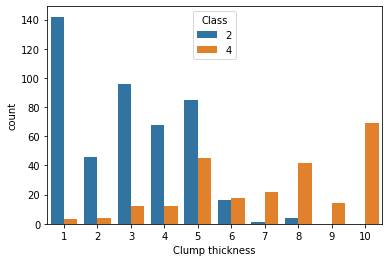

In [14]:
sns.countplot(x='Clump thickness', hue='Class', data=df)

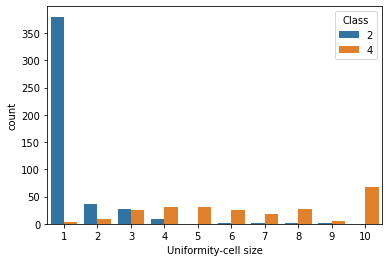

In [15]:
sns.countplot(x='Uniformity-cell size', hue='Class', data=df)

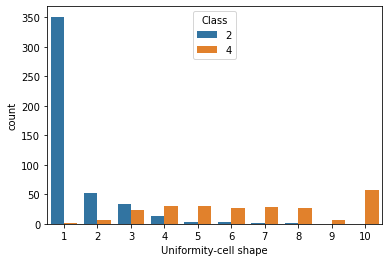

In [16]:
sns.countplot(x='Uniformity-cell shape', hue='Class', data=df)

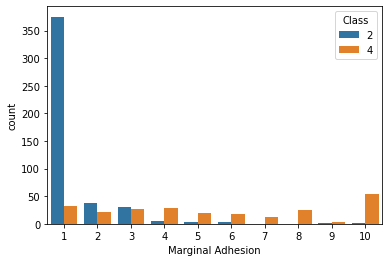

In [17]:
sns.countplot(x='Marginal Adhesion', hue='Class', data=df)

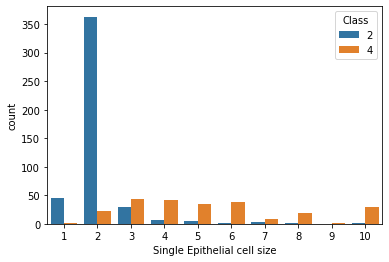

In [18]:
sns.countplot(x='Single Epithelial cell size', hue='Class', data=df)

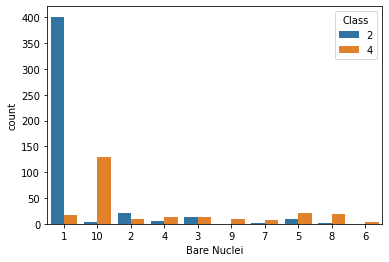

In [19]:
sns.countplot(x='Bare Nuclei', hue='Class', data=df)

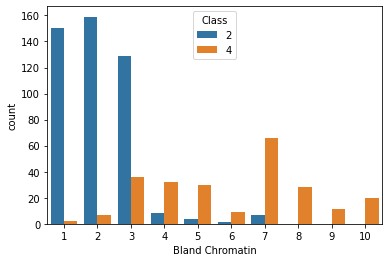

In [20]:
sns.countplot(x='Bland Chromatin', hue='Class', data=df)

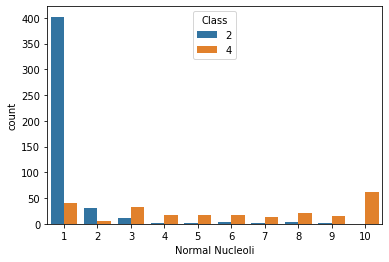

In [21]:
sns.countplot(x='Normal Nucleoli', hue='Class', data=df)

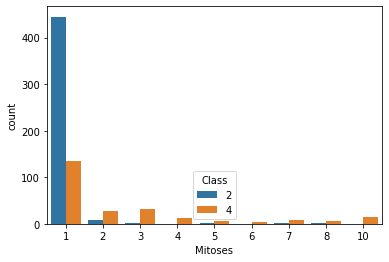

In [22]:
sns.countplot(x='Mitoses', hue='Class', data=df)

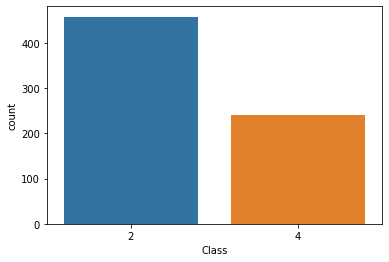

In [23]:
sns.countplot(x='Class', data=df)

In [24]:
# Calculating the percentage of each class
counts = df['Class'].value_counts()
print('Benign: ' + str(counts[2]) + ' (' + str(round(counts[2]/counts.sum(), 2)*100) + '%)' )
print('Malignant: ' + str(counts[4]) + ' (' + str(round(counts[4]/counts.sum(), 2)*100) + '%)' )


Benign: 458 (66.0%)
Malignant: 241 (34.0%)


In [25]:
#Dividing the data into dependent and independent attributes
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y = y.astype('int')

In [26]:
print(x)

[[5 1 1 ... 3 1 1]
 [5 4 4 ... 3 2 1]
 [3 1 1 ... 3 1 1]
 ...
 [5 10 10 ... 8 10 2]
 [4 8 6 ... 10 6 1]
 [4 8 8 ... 10 4 1]]


In [27]:
print(y)

[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 4
 2 4 4 2 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4
 4 2 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2
 4 4 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2
 2 4 2 4 4 2 2 4 2 2 2 4 4 2 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4
 2 4 4 4 2 4 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4
 4 4 4 2 4 4 2 4 4 4 2 4 2 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 2 4 2 4 4 4 2 2 2
 2 4 4 4 4 4 2 4 4 4 2 4 2 4 4 2 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 4
 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 4 2 2 2 4 4 2 2 4 2 2 4 2 2 4 2 4 4 4 2 2
 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2
 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2
 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2
 2 4 4 2 2 2 4 4 4 2 4 2 

In [28]:
#Dividing the data into test and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [29]:
print(len(x_train))

524


In [30]:
print(y_train)

[4 2 4 4 2 4 2 4 2 2 4 4 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 4
 4 2 4 4 4 2 4 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2
 2 2 2 2 2 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 4 4 2 2 2 4 4 4 4 2 4
 2 2 2 4 4 4 2 2 4 2 2 2 4 4 2 4 2 4 2 2 2 2 2 4 4 2 2 4 2 4 2 4 4 2 4 2 2
 4 2 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 4 4 4 4 2 4 2 2 2 2 2 4 4 2 4 4 4 2
 2 2 4 2 4 4 2 4 2 2 2 2 2 4 2 4 2 2 4 4 2 2 2 4 4 4 2 2 2 2 4 2 4 2 2 2 2
 2 2 2 2 2 4 4 4 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 4 2 4
 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 2 4 2 2 2 2 2 4 4 2 2 4 2 2 4 4 2 4
 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 2 2 2 2
 2 4 4 2 2 4 2 2 2 2 4 2 2 4 4 2 2 4 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 4 2
 2 2 2 4 2 2 2 2 4 2 4 2 4 4 2 2 2 4 4 4 2 2 2 2 4 2 2 4 2 4 2 4 2 2 4 2 2
 2 2 2 2 4 2 2 2 4 4 4 4 4 2 2 2 2 4 4 4 4 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2
 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2
 4 4 4 2 4 2 2 4 2 2 2 2 

In [31]:
print(x_test)

[[4 1 2 ... 1 1 1]
 [4 2 2 ... 2 1 1]
 [6 6 6 ... 7 8 1]
 ...
 [5 3 2 ... 1 1 1]
 [1 1 1 ... 3 1 1]
 [4 1 1 ... 3 2 1]]


In [32]:
print(y_test)

[2 2 2 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 4 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 2 4
 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 2 2]


In [33]:
# Importing the required models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# Importing module for K - Fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [35]:
classifier = SVC()
accuracies = cross_val_score(classifier, x_train, y_train, cv=k_fold, scoring='accuracy')
print(accuracies.mean())

0.97144412191582


In [36]:
classifier_knn = KNeighborsClassifier()

In [37]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
parameters = [{ 'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]}]
grid_search = GridSearchCV(estimator=classifier_knn,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs= -1)
grid_search.fit(x_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 96.77 %
Best Parameters: {'n_neighbors': 5}


In [38]:
accuracies = cross_val_score(classifier_knn, x_train, y_train, cv=k_fold, scoring='accuracy')
print(accuracies.mean())

0.9655660377358488


In [39]:
# Testing the classifier for test set
classifier_1 = SVC()
classifier_1.fit(x_train, y_train)
y_pred_1 = classifier_1.predict(x_test)
print(y_pred_1)

[2 2 4 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 2 4 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 2 2
 2 2 2 4 4 4 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 2 2]


confusion matrix :


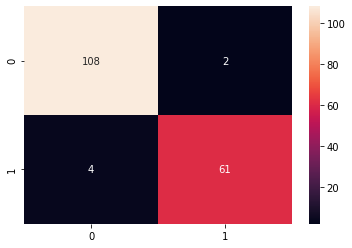

In [40]:
#Generating Confusion mattrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm_1 = confusion_matrix(y_pred_1, y_test)
print("confusion matrix :")
sns.heatmap(cm_1, annot=True, fmt='d' )

In [41]:
print("Classification report: ")
print(str(classification_report(y_pred_1, y_test)))
print("Accuracy Score: " + str(accuracy_score(y_pred_1, y_test)))

Classification report: 
              precision    recall  f1-score   support

           2       0.96      0.98      0.97       110
           4       0.97      0.94      0.95        65

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

Accuracy Score: 0.9657142857142857


In [42]:
classifier_2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_2.fit(x_train, y_train)
y_pred_2 = classifier_2.predict(x_test)
print(y_pred_2)

[2 2 4 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 2 2
 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 2 2]


confusion matrix :


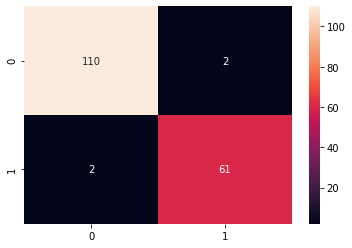

In [43]:
#Generating Confusion mattrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm_2 = confusion_matrix(y_pred_2, y_test)
print("confusion matrix :")
sns.heatmap(cm_2, annot=True, fmt='d' )

In [44]:
print("Classification report: ")
print(str(classification_report(y_pred_2, y_test)))
print("Accuracy Score: " + str(accuracy_score(y_pred_2, y_test)))

Classification report: 
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       112
           4       0.97      0.97      0.97        63

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

Accuracy Score: 0.9771428571428571
